In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df_pay = pd.read_excel(r'C:\Users\Lenovo\Documents\Work\Pelindo\data\Data Payment Praya W1 September 2024.xlsx')

In [3]:
df_ori = pd.read_excel(r'C:\Users\Lenovo\Documents\Work\Pelindo\data\ori_PRAYA_PROD_DETAIL_PAYMENT.xls')

# Match Data df_pay With df_ori

due to df_pay data show some data not in september 2024

In [4]:
df_pay.columns

Index(['INVOICE_NUMBER', 'PAYMENT_CODE', 'PAYMENT_DATE_IHUB', 'FLAGGING_PRAYA',
       'SAP_SEND_LOG', 'STATUS', 'SAP_COMPLETE',
       'Jeda flagging lunas di PRAYA dari saat customer melakukan payment',
       'Jeda pengiriman nota praya ke SAP',
       'Lama Proses Generate No Faktur di SAP',
       'Total Lamanya Nota dapat dicetak sejak customer melakukan pembayaran'],
      dtype='object')

In [5]:
df_pay.rename(columns={'INVOICE_NUMBER': 'invoice_number',
                   'PAYMENT_CODE':'payment_code',
                   'PAYMENT_DATE_IHUB':'payment_date_ihub',
                   'FLAGGING_PRAYA': 'flagging_praya',
                   'SAP_SEND_LOG':'sap_send_log',
                   'STATUS': 'status',
                   'SAP_COMPLETE':'sap_complete',
                   'Jeda flagging lunas di PRAYA dari saat customer melakukan payment': 'flagging_praya_delay',
                   'Jeda pengiriman nota praya ke SAP':'sap_send_delay',
                   'Lama Proses Generate No Faktur di SAP':'sap_nofaktur_generate_time',
                   'Total Lamanya Nota dapat dicetak sejak customer melakukan pembayaran':'total_time_to_print_invoice'}, inplace=True)

In [6]:
df_pay.columns

Index(['invoice_number', 'payment_code', 'payment_date_ihub', 'flagging_praya',
       'sap_send_log', 'status', 'sap_complete', 'flagging_praya_delay',
       'sap_send_delay', 'sap_nofaktur_generate_time',
       'total_time_to_print_invoice'],
      dtype='object')

In [7]:
df_ori.columns

Index(['INVOICE_NUMBER', 'NO_INTEGRATION_SAP', 'DOC_NO_SAP', 'PAYMENT_CODE',
       'PAYMENT_DATE_IHUB', 'FLAGGING_PRAYA', 'SAP_SEND_LOG', 'STATUS',
       'SAP_COMPLETE', 'FAKTUR_SAP', 'SELISIH SAP DAN FLAGGING PRAY',
       'KATEGORI_SELISIH SAP DAN FRAGGING',
       'SELISIH FRAGGING DAN PAYMENT_DATE',
       'KATEGORI_SELISIH FRAGGING DAN PAYMENT_DATE'],
      dtype='object')

In [8]:
df_ori.columns = df_ori.columns.str.replace(' ', '_').str.lower()

In [9]:
df_ori.columns

Index(['invoice_number', 'no_integration_sap', 'doc_no_sap', 'payment_code',
       'payment_date_ihub', 'flagging_praya', 'sap_send_log', 'status',
       'sap_complete', 'faktur_sap', 'selisih_sap_dan_flagging_pray',
       'kategori_selisih_sap_dan_fragging',
       'selisih_fragging_dan_payment_date',
       'kategori_selisih_fragging_dan_payment_date'],
      dtype='object')

**findings**: Dilakukan standarisasi nama parameter untuk memudahkan dalam analisis data. Standarisasi yang dilakukan berupa penggunaan underscore (_) untuk setiap spasi, tidak adanya penggunaan huruf kapital, dan mengubah nama parameter yang terlalu panjang. Standarisasi ini dilakukan untuk kedua dataframe (**df_pay** dan **df_ori**)

In [10]:
# check if there are the same value for df_pay invoice_number and df_ori invoice_number
df_pay['invoice_number'].isin(df_ori['invoice_number']).value_counts()

invoice_number
True    590
Name: count, dtype: int64

In [11]:
# check if there are the same value for df_ori invoice_number and df_pay invoice_number (opposite)
df_ori['invoice_number'].isin(df_pay['invoice_number']).value_counts()

invoice_number
False    8879
True      591
Name: count, dtype: int64

**findings**: ada data dari df_pay yang sama dengan df_ori berdasarkan invoice_number dengan jumlah baris yang sesuai dengan total df_pay yang berarti semua invoice_number di df_pay ada di df_ori.

Namun, ketika dilakukan sebaliknya, ada 591 data dari df_ori yang memiliki invoice number yang sama dengan df_pay, yang berarti melebihi total data seharusnya dari df_pay.

In [12]:
check_true_invoice = df_ori[df_ori['invoice_number'].isin(df_pay['invoice_number'])]

check_true_invoice.head(5)

,invoice_number,no_integration_sap,doc_no_sap,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,faktur_sap,selisih_sap_dan_flagging_pray,kategori_selisih_sap_dan_fragging,selisih_fragging_dan_payment_date,kategori_selisih_fragging_dan_payment_date
6,010.182.24-01.011686,I480099407/2024,9800098239/2024-3000,12409731015011,2024-09-08 13:52:00,2024-09-08 20:52:03,2024-09-08 20:53:04,PAID,2024-09-08 20:53:08,010.30112.24.00011044,1.016667,>1 MENIT,0.050000,<1 MENIT
11,010.643.24-73.042795,I480099420/2024,9800098252/2024-3000,12409731015663,2024-09-08 14:39:00,2024-09-08 21:39:02,2024-09-08 21:40:02,PAID,2024-09-08 21:40:06,010.30196.24.00028105,1.000000,>1 MENIT,0.033333,<1 MENIT
59,010.182.24-01.011673,I480099357/2024,9800098189/2024-3000,12409731015521,2024-09-08 11:27:00,2024-09-08 18:27:02,2024-09-08 18:28:03,PAID,2024-09-08 18:28:07,010.30112.24.00011032,1.016667,>1 MENIT,0.033333,<1 MENIT
64,010.182.24-01.011672,I480099353/2024,9800098185/2024-3000,12409731015511,2024-09-08 11:11:00,2024-09-08 18:11:01,2024-09-08 18:12:04,PAID,2024-09-08 18:12:08,010.30112.24.00011031,1.050000,>1 MENIT,0.016667,<1 MENIT
66,010.643.24-74.029123,I480099370/2024,9800098202/2024-3000,12409731013850,2024-09-08 12:04:00,2024-09-08 19:04:02,2024-09-08 19:05:02,PAID,2024-09-08 19:05:07,010.30196.24.00028084,1.000000,>1 MENIT,0.033333,<1 MENIT


In [13]:
check_true_invoice[check_true_invoice.duplicated('invoice_number')]

,invoice_number,no_integration_sap,doc_no_sap,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,faktur_sap,selisih_sap_dan_flagging_pray,kategori_selisih_sap_dan_fragging,selisih_fragging_dan_payment_date,kategori_selisih_fragging_dan_payment_date
6513,010.643.24-01.000566,I480090848/2024,9800089742/2024-3000,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-09-02 10:56:57,PAID,2024-09-02 10:57:03,010.30196.24.00025654,74953.75,>2 MENIT,0.2,<1 MENIT


In [14]:
check_true_invoice[check_true_invoice['invoice_number'] == '010.643.24-01.000566']

,invoice_number,no_integration_sap,doc_no_sap,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,faktur_sap,selisih_sap_dan_flagging_pray,kategori_selisih_sap_dan_fragging,selisih_fragging_dan_payment_date,kategori_selisih_fragging_dan_payment_date
6512,010.643.24-01.000566,I480090848/2024,9800089742/2024-3000,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-07-12 09:43:44,PAID,2024-09-02 10:57:03,010.30196.24.00025654,0.533333,<1 MENIT,0.2,<1 MENIT
6513,010.643.24-01.000566,I480090848/2024,9800089742/2024-3000,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-09-02 10:56:57,PAID,2024-09-02 10:57:03,010.30196.24.00025654,74953.750000,>2 MENIT,0.2,<1 MENIT


In [15]:
df_pay[df_pay['invoice_number'] == '010.643.24-01.000566']

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
384,010.643.24-01.000566,12409731015011,2025-09-27 13:51:59.995,2025-09-27 20:52:02.995,2025-09-27 20:53:04,PAID,2025-09-27 20:53:07.995,0 days 00:00:12,52 days 01:13:45,0 days 00:00:06,52 days 01:14:03


**findings**: terdapat data yang terduplikasi pada df_ori dengan invoice_number yang sama dengan data di df_pay, yaitu data dengan invoice number `010.643.24-01.000566`. Namun, dua data tersebut secara keseluruhan hampir memiliki value yang sama untuk tiap parameter dan hanya berbeda pada value untuk parameter **sap_send_log**.

Ditemukan juga data tidak sinkron atau ada kesalahan pada input data payment_date_ihub, flagging_praya, sap_send_log, an sap_complete. Seharusnya data pada df_ori dan df_pay yang memiliki invoice number yang sama, maka akan memiliki nilai yang sama pada kolom yang disebutkan sebelumnya. 

In [16]:
df_ori['payment_code'].isin(df_pay['payment_code']).value_counts()

payment_code
False    9469
True        1
Name: count, dtype: int64

In [17]:
df_ori[df_ori['payment_code'].isin(df_pay['payment_code'])]

,invoice_number,no_integration_sap,doc_no_sap,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,faktur_sap,selisih_sap_dan_flagging_pray,kategori_selisih_sap_dan_fragging,selisih_fragging_dan_payment_date,kategori_selisih_fragging_dan_payment_date
6,010.182.24-01.011686,I480099407/2024,9800098239/2024-3000,12409731015011,2024-09-08 13:52:00,2024-09-08 20:52:03,2024-09-08 20:53:04,PAID,2024-09-08 20:53:08,010.30112.24.00011044,1.016667,>1 MENIT,0.05,<1 MENIT


In [18]:
df_pay.loc[(df_pay['payment_code'] == 12409731015011) & (df_pay['invoice_number'] == '010.182.24-01.011686')]

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
0,010.182.24-01.011686,12409731015011,2024-09-08 13:52:00,2024-09-08 20:52:03,2024-09-08 20:53:04,PAID,2024-09-08 20:53:08,0 days 00:00:03,0 days 00:01:01,0 days 00:00:04,0 days 00:01:08


In [19]:
df_ori[df_ori['invoice_number'] == '010.182.24-01.011686']

,invoice_number,no_integration_sap,doc_no_sap,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,faktur_sap,selisih_sap_dan_flagging_pray,kategori_selisih_sap_dan_fragging,selisih_fragging_dan_payment_date,kategori_selisih_fragging_dan_payment_date
6,010.182.24-01.011686,I480099407/2024,9800098239/2024-3000,12409731015011,2024-09-08 13:52:00,2024-09-08 20:52:03,2024-09-08 20:53:04,PAID,2024-09-08 20:53:08,010.30112.24.00011044,1.016667,>1 MENIT,0.05,<1 MENIT


**findings**: Terdapat satu data pada df_ori yang memiliki nilai payment_code yang sama dengan data pada df_pay. Kedua data tersebut juga memiliki nilai invoice_number yang sama.

In [20]:
df_pay.columns

Index(['invoice_number', 'payment_code', 'payment_date_ihub', 'flagging_praya',
       'sap_send_log', 'status', 'sap_complete', 'flagging_praya_delay',
       'sap_send_delay', 'sap_nofaktur_generate_time',
       'total_time_to_print_invoice'],
      dtype='object')

In [21]:
df_pay.shape

(590, 11)

In [22]:
for col in df_pay.columns:
    unique_count = df_pay[col].nunique()
    print(f"{col}: {unique_count}")

invoice_number: 590
payment_code: 1
payment_date_ihub: 590
flagging_praya: 590
sap_send_log: 590
status: 1
sap_complete: 590
flagging_praya_delay: 49
sap_send_delay: 50
sap_nofaktur_generate_time: 70
total_time_to_print_invoice: 128


**findings**: pada hasil unique untuk df_pay, payment_code dan status hanya memiliki satu value unique yang tidak akan mempengaruhi analisis.

In [23]:
df_ori.columns

Index(['invoice_number', 'no_integration_sap', 'doc_no_sap', 'payment_code',
       'payment_date_ihub', 'flagging_praya', 'sap_send_log', 'status',
       'sap_complete', 'faktur_sap', 'selisih_sap_dan_flagging_pray',
       'kategori_selisih_sap_dan_fragging',
       'selisih_fragging_dan_payment_date',
       'kategori_selisih_fragging_dan_payment_date'],
      dtype='object')

In [24]:
df_ori.shape

(9470, 14)

In [25]:
for col in df_ori.columns:
    unique_count = df_ori[col].nunique()
    print(f"{col}: {unique_count}")

invoice_number: 9469
no_integration_sap: 9469
doc_no_sap: 9469
payment_code: 9469
payment_date_ihub: 5210
flagging_praya: 8783
sap_send_log: 8465
status: 1
sap_complete: 9312
faktur_sap: 9469
selisih_sap_dan_flagging_pray: 311
kategori_selisih_sap_dan_fragging: 4
selisih_fragging_dan_payment_date: 127
kategori_selisih_fragging_dan_payment_date: 3


**findings**: pada hasil unique untuk df_ori, status hanya memiliki satu value unique yang tidak akan mempengaruhi analisis.

In [26]:
columns_to_update = ['flagging_praya', 'payment_code', 'payment_date_ihub', 'sap_send_log', 'sap_complete']

df_pay_updated = df_pay.merge(df_ori[['invoice_number'] + columns_to_update], on='invoice_number', how='left', suffixes=('', '_ori'))

for col in columns_to_update:
    df_pay_updated[col] = df_pay_updated[f'{col}_ori'].combine_first(df_pay_updated[col])

df_pay_updated = df_pay_updated.drop(columns=[f'{col}_ori' for col in columns_to_update])


In [27]:
df_pay_updated.sample(5)

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
558,000.184.24-77.011063,12409730987248,2024-09-02 06:11:00,2024-09-02 13:11:08,2024-09-02 13:12:08,PAID,2024-09-02 13:12:25,0 days 00:00:08,0 days 00:01:00,0 days 00:00:17,0 days 00:01:25
126,010.183.24-73.062337,12409731007551,2024-09-06 06:07:00,2024-09-06 13:07:03,2024-09-06 13:08:03,PAID,2024-09-06 13:08:06,0 days 00:00:03,0 days 00:01:00,0 days 00:00:03,0 days 00:01:06
87,010.183.24-74.039277,12409731010304,2024-09-06 13:32:00,2024-09-06 20:32:06,2024-09-06 20:33:14,PAID,2024-09-06 20:33:18,0 days 00:00:06,0 days 00:01:08,0 days 00:00:04,0 days 00:01:18
535,000.184.24-77.011092,12409730992623,2024-09-03 04:00:00,2024-09-03 11:00:03,2024-09-03 11:01:06,PAID,2024-09-03 11:01:11,0 days 00:00:03,0 days 00:01:03,0 days 00:00:05,0 days 00:01:11
409,010.183.24-74.038310,12409730984841,2024-09-01 08:17:00,2024-09-01 15:17:02,2024-09-01 15:18:03,PAID,2024-09-01 15:18:06,0 days 00:00:02,0 days 00:01:01,0 days 00:00:03,0 days 00:01:06


In [28]:
df_pay_updated.shape

(591, 11)

In [29]:
df_pay[df_pay['invoice_number'] == '010.643.24-01.000566']

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
384,010.643.24-01.000566,12409731015011,2025-09-27 13:51:59.995,2025-09-27 20:52:02.995,2025-09-27 20:53:04,PAID,2025-09-27 20:53:07.995,0 days 00:00:12,52 days 01:13:45,0 days 00:00:06,52 days 01:14:03


In [30]:
df_pay_updated[df_pay_updated['invoice_number'] == '010.643.24-01.000566']

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
384,010.643.24-01.000566,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-07-12 09:43:44,PAID,2024-09-02 10:57:03,0 days 00:00:12,52 days 01:13:45,0 days 00:00:06,52 days 01:14:03
385,010.643.24-01.000566,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-09-02 10:56:57,PAID,2024-09-02 10:57:03,0 days 00:00:12,52 days 01:13:45,0 days 00:00:06,52 days 01:14:03


**findings**: setelah dilakukan merge untuk kolom `flagging_praya`, `payment_code`, `payment_date_ihub`, `sap_send_log`, `sap_complete` berdasarkan invoice number yang sama dari df_ori ke df_pay, jumlah data pada df_pay bertambah menjadi 591. Hal ini disebabkan karena sebelumnya terdapat dua data yang sama pada df_ori dengan df_pay berdasarkan invoice number. Sehingga, data dengan `invoice_number` = `010.643.24-01.000566` menjadi terduplikasi.

In [31]:
df_pay_temp = df_pay_updated.copy()
df_pay_temp['difference'] = df_pay_temp['sap_complete'] - df_pay_temp['sap_send_log']

# Tampilkan hasil
df_pay_temp[df_pay_temp['invoice_number'] == '010.643.24-01.000566'][['invoice_number', 'sap_complete', 'sap_send_log', 'difference']]

,invoice_number,sap_complete,sap_send_log,difference
384,010.643.24-01.000566,2024-09-02 10:57:03,2024-07-12 09:43:44,52 days 01:13:19
385,010.643.24-01.000566,2024-09-02 10:57:03,2024-09-02 10:56:57,0 days 00:00:06


In [32]:
df_pay_temp.sample(5)

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice,difference
108,010.183.24-73.062417,12409731009290,2024-09-06 08:40:00,2024-09-06 15:40:01,2024-09-06 15:41:02,PAID,2024-09-06 15:41:06,0 days 00:00:01,0 days 00:01:01,0 days 00:00:04,0 days 00:01:06,0 days 00:00:04
466,000.184.24-74.027891,12409731006066,2024-09-06 03:27:00,2024-09-06 10:27:00,2024-09-06 10:28:05,PAID,2024-09-06 10:28:08,0 days 00:00:00,0 days 00:01:05,0 days 00:00:03,0 days 00:01:08,0 days 00:00:03
376,010.183.24-73.051838,12407730843413,2024-07-30 08:36:00,2024-07-30 15:36:16,2024-09-02 13:01:01,PAID,2024-09-02 13:01:08,0 days 00:00:16,33 days 21:24:45,0 days 00:00:07,33 days 21:25:08,0 days 00:00:07
184,010.183.24-74.038921,12409731000898,2024-09-05 01:46:00,2024-09-05 08:46:53,2024-09-05 13:28:30,PAID,2024-09-05 13:28:33,0 days 00:00:53,0 days 04:41:37,0 days 00:00:03,0 days 04:42:33,0 days 00:00:03
244,010.182.24-01.011088,12409730996294,2024-09-04 06:00:00,2024-09-04 13:01:00,2024-09-04 13:02:03,PAID,2024-09-04 13:02:12,0 days 00:01:00,0 days 00:01:03,0 days 00:00:09,0 days 00:02:12,0 days 00:00:09


In [33]:
# remove data from df_pay_update for index 384

df_pay_updated = df_pay_updated.drop(index=384)


**findings**: setelah dilakukan analisis berupa mengurangi sap_complete dengan `sap_send_log`, ditemukan bahwa formula tersebut digunakan untuk mendapatkan nilai `sap_nofaktur_generate_time`. Hal ini berdasarkan hasil yang didapatkan pada data dengan `invoice_number = 010.643.24-01.000566` yang terdapat dua data (terduplikasi) dengan perbedaan antara keduanya yaitu pada `sap_send_log`. Ketika diterapkan formula tersebut, didapatkan perbedaan nilai 6 detik, dimana nilai tersebut sama dengan nilai `sap_nofaktur_generate_time` pada df_pay baik sebelum di merge maupun sesudah.

Oleh karena itu, satu data lainnya yang tidak memiliki perbedaan sebesar 6 detik dihapus.

In [34]:
# check if there are some datas that are not in september based on payment_date_ihub
payment_date_check = df_pay_updated[~((df_pay_updated['payment_date_ihub'].dt.year == 2024) & (df_pay_updated['payment_date_ihub'].dt.month == 9))]

payment_date_check.shape

(4, 11)

In [35]:
# check if there are some datas that are not in september based on flagging_praya
flag_check = df_pay_updated[~((df_pay_updated['flagging_praya'].dt.year == 2024) & (df_pay_updated['flagging_praya'].dt.month == 9))]

flag_check.shape

(4, 11)

In [36]:
# check if there are some datas that are not in september based on sap_send_log
sap_send_check = df_pay_updated[~((df_pay_updated['sap_send_log'].dt.year == 2024) & (df_pay_updated['sap_send_log'].dt.month == 9))]

sap_send_check.shape

(1, 11)

In [37]:
# check if there are some datas that are not in september based on sap_complete
sap_complete_check = df_pay_updated[~((df_pay_updated['sap_complete'].dt.year == 2024) & (df_pay_updated['sap_complete'].dt.month == 9))]

sap_complete_check.shape

(1, 11)

In [38]:
sap_complete_check

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
416,010.183.24-73.060990,12408730984058,2024-08-31 16:48:00,2024-08-31 23:48:02,2024-08-31 23:49:03,PAID,2024-08-31 23:49:07,0 days 00:00:02,0 days 00:01:01,0 days 00:00:04,0 days 00:01:07


In [39]:
df_pay_updated = df_pay_updated[(df_pay_updated['sap_complete'].dt.year == 2024) & (df_pay_updated['sap_complete'].dt.month == 9)]

df_pay_updated.shape

(589, 11)

In [40]:
df_pay_updated.sample(5)

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,status,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
232,010.182.24-01.011149,12408730900836,2024-09-04 07:26:00,2024-09-04 14:26:00,2024-09-04 14:27:02,PAID,2024-09-04 14:27:05,0 days 00:00:00,0 days 00:01:02,0 days 00:00:03,0 days 00:01:05
485,000.184.24-77.011185,12409731002463,2024-09-05 03:39:00,2024-09-05 10:39:41,2024-09-05 10:40:52,PAID,2024-09-05 10:40:54,0 days 00:00:41,0 days 00:01:11,0 days 00:00:02,0 days 00:01:54
186,010.183.24-77.011689,12409731002593,2024-09-05 05:44:00,2024-09-05 12:44:03,2024-09-05 12:45:08,PAID,2024-09-05 12:45:11,0 days 00:00:03,0 days 00:01:05,0 days 00:00:03,0 days 00:01:11
142,010.183.24-74.039134,12409731006288,2024-09-06 00:51:00,2024-09-06 07:51:01,2024-09-06 07:52:02,PAID,2024-09-06 07:52:06,0 days 00:00:01,0 days 00:01:01,0 days 00:00:04,0 days 00:01:06
400,010.183.24-74.038350,12409730985481,2024-09-02 00:18:00,2024-09-02 07:18:04,2024-09-02 07:19:07,PAID,2024-09-02 07:19:10,0 days 00:00:04,0 days 00:01:03,0 days 00:00:03,0 days 00:01:10


**findings**: diasumsikan bahwa data per 1 September dilihat dari date time sap_complete dikarenakan ada beberapa nilai pada parameter lain seperti `flagging_praya` yang memiliki lebih dari 5 data dengan date time diluar bulan september.

# Data Cleaning

In [41]:
for col in df_pay_updated.columns:
    unique_count = df_pay_updated[col].nunique()
    print(f"{col}: {unique_count}")

invoice_number: 589
payment_code: 589
payment_date_ihub: 412
flagging_praya: 533
sap_send_log: 578
status: 1
sap_complete: 587
flagging_praya_delay: 49
sap_send_delay: 50
sap_nofaktur_generate_time: 70
total_time_to_print_invoice: 128


In [42]:
df_pay_updated.drop(['status'], axis=1, inplace=True)

df_pay_updated.columns

Index(['invoice_number', 'payment_code', 'payment_date_ihub', 'flagging_praya',
       'sap_send_log', 'sap_complete', 'flagging_praya_delay',
       'sap_send_delay', 'sap_nofaktur_generate_time',
       'total_time_to_print_invoice'],
      dtype='object')

In [43]:
# check if there are minus/negative value in flagging_praya_delay
df_flag_minus = df_pay_updated[df_pay_updated['flagging_praya_delay'].dt.total_seconds() < 0]

df_flag_minus.shape

(10, 10)

In [44]:
# check if there are minus/negative value in sap_send_delay
df_sap_minus = df_pay_updated[df_pay_updated['sap_send_delay'].dt.total_seconds() < 0]

df_sap_minus.shape

(0, 10)

In [45]:
# check if there are minus/negative value in sap_nofaktur_generate_time
df_fraktur_minus = df_pay_updated[df_pay_updated['sap_nofaktur_generate_time'].dt.total_seconds() < 0]

df_fraktur_minus.shape

(0, 10)

In [46]:
# check if there are minus/negative value in total_time_to_print_invoice
df_time_minus = df_pay_updated[df_pay_updated['total_time_to_print_invoice'].dt.total_seconds() < 0]

df_time_minus.shape

(9, 10)

In [47]:
df_time_minus

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
434,010.184.24-73.004797,12409731012670,2024-09-07 11:21:00,2024-09-07 11:21:00,2024-09-07 11:22:01,2024-09-07 11:22:04,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:03,-1 days +17:01:04
440,000.184.24-73.017941,12409731012492,2024-09-07 10:53:00,2024-09-07 10:53:00,2024-09-07 10:54:01,2024-09-07 10:54:05,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:04,-1 days +17:01:05
450,010.184.24-73.004789,12409731012129,2024-09-07 10:10:01,2024-09-07 10:10:01,2024-09-07 10:11:01,2024-09-07 10:14:27,-1 days +17:00:00,0 days 00:01:00,0 days 00:03:26,-1 days +17:04:26
463,000.184.24-73.017907,12409731009571,2024-09-06 16:27:34,2024-09-06 16:27:34,2024-09-06 16:28:39,2024-09-06 16:28:42,-1 days +17:00:00,0 days 00:01:05,0 days 00:00:03,-1 days +17:01:08
491,000.184.24-73.017749,12409731002214,2024-09-05 09:50:01,2024-09-05 09:50:01,2024-09-05 09:51:02,2024-09-05 09:51:05,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:03,-1 days +17:01:04
520,010.184.24-73.004636,12409730995090,2024-09-03 16:12:00,2024-09-03 16:12:00,2024-09-03 16:13:01,2024-09-03 16:15:21,-1 days +17:00:00,0 days 00:01:01,0 days 00:02:20,-1 days +17:03:21
536,010.184.24-73.004602,12409730992404,2024-09-03 10:11:00,2024-09-03 10:11:00,2024-09-03 10:12:01,2024-09-03 10:16:40,-1 days +17:00:00,0 days 00:01:01,0 days 00:04:39,-1 days +17:05:40
570,010.184.24-73.004577,12409730987345,2024-09-02 11:23:01,2024-09-02 11:23:01,2024-09-02 11:24:01,2024-09-02 11:24:07,-1 days +17:00:00,0 days 00:01:00,0 days 00:00:06,-1 days +17:01:06
589,010.184.24-73.004568,12409730984366,2024-09-01 09:56:02,2024-09-01 09:56:02,2024-09-01 09:57:02,2024-09-01 09:57:05,-1 days +17:00:00,0 days 00:01:00,0 days 00:00:03,-1 days +17:01:03


In [48]:
df_flag_minus

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
368,010.183.24-69.000951,12408730982286,2024-08-31 12:03:29,2024-08-31 12:03:29,2024-09-02 13:53:02,2024-09-02 13:53:06,-1 days +17:00:00,2 days 01:49:33,0 days 00:00:04,1 days 18:49:37
434,010.184.24-73.004797,12409731012670,2024-09-07 11:21:00,2024-09-07 11:21:00,2024-09-07 11:22:01,2024-09-07 11:22:04,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:03,-1 days +17:01:04
440,000.184.24-73.017941,12409731012492,2024-09-07 10:53:00,2024-09-07 10:53:00,2024-09-07 10:54:01,2024-09-07 10:54:05,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:04,-1 days +17:01:05
450,010.184.24-73.004789,12409731012129,2024-09-07 10:10:01,2024-09-07 10:10:01,2024-09-07 10:11:01,2024-09-07 10:14:27,-1 days +17:00:00,0 days 00:01:00,0 days 00:03:26,-1 days +17:04:26
463,000.184.24-73.017907,12409731009571,2024-09-06 16:27:34,2024-09-06 16:27:34,2024-09-06 16:28:39,2024-09-06 16:28:42,-1 days +17:00:00,0 days 00:01:05,0 days 00:00:03,-1 days +17:01:08
491,000.184.24-73.017749,12409731002214,2024-09-05 09:50:01,2024-09-05 09:50:01,2024-09-05 09:51:02,2024-09-05 09:51:05,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:03,-1 days +17:01:04
520,010.184.24-73.004636,12409730995090,2024-09-03 16:12:00,2024-09-03 16:12:00,2024-09-03 16:13:01,2024-09-03 16:15:21,-1 days +17:00:00,0 days 00:01:01,0 days 00:02:20,-1 days +17:03:21
536,010.184.24-73.004602,12409730992404,2024-09-03 10:11:00,2024-09-03 10:11:00,2024-09-03 10:12:01,2024-09-03 10:16:40,-1 days +17:00:00,0 days 00:01:01,0 days 00:04:39,-1 days +17:05:40
570,010.184.24-73.004577,12409730987345,2024-09-02 11:23:01,2024-09-02 11:23:01,2024-09-02 11:24:01,2024-09-02 11:24:07,-1 days +17:00:00,0 days 00:01:00,0 days 00:00:06,-1 days +17:01:06
589,010.184.24-73.004568,12409730984366,2024-09-01 09:56:02,2024-09-01 09:56:02,2024-09-01 09:57:02,2024-09-01 09:57:05,-1 days +17:00:00,0 days 00:01:00,0 days 00:00:03,-1 days +17:01:03


In [49]:
# Check if there are same data (rows) in df_time_minus and df_flag_minus
same_rows = df_time_minus.merge(df_flag_minus, how='inner')

# Display the common rows
same_rows

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
0,010.184.24-73.004797,12409731012670,2024-09-07 11:21:00,2024-09-07 11:21:00,2024-09-07 11:22:01,2024-09-07 11:22:04,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:03,-1 days +17:01:04
1,000.184.24-73.017941,12409731012492,2024-09-07 10:53:00,2024-09-07 10:53:00,2024-09-07 10:54:01,2024-09-07 10:54:05,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:04,-1 days +17:01:05
2,010.184.24-73.004789,12409731012129,2024-09-07 10:10:01,2024-09-07 10:10:01,2024-09-07 10:11:01,2024-09-07 10:14:27,-1 days +17:00:00,0 days 00:01:00,0 days 00:03:26,-1 days +17:04:26
3,000.184.24-73.017907,12409731009571,2024-09-06 16:27:34,2024-09-06 16:27:34,2024-09-06 16:28:39,2024-09-06 16:28:42,-1 days +17:00:00,0 days 00:01:05,0 days 00:00:03,-1 days +17:01:08
4,000.184.24-73.017749,12409731002214,2024-09-05 09:50:01,2024-09-05 09:50:01,2024-09-05 09:51:02,2024-09-05 09:51:05,-1 days +17:00:00,0 days 00:01:01,0 days 00:00:03,-1 days +17:01:04
5,010.184.24-73.004636,12409730995090,2024-09-03 16:12:00,2024-09-03 16:12:00,2024-09-03 16:13:01,2024-09-03 16:15:21,-1 days +17:00:00,0 days 00:01:01,0 days 00:02:20,-1 days +17:03:21
6,010.184.24-73.004602,12409730992404,2024-09-03 10:11:00,2024-09-03 10:11:00,2024-09-03 10:12:01,2024-09-03 10:16:40,-1 days +17:00:00,0 days 00:01:01,0 days 00:04:39,-1 days +17:05:40
7,010.184.24-73.004577,12409730987345,2024-09-02 11:23:01,2024-09-02 11:23:01,2024-09-02 11:24:01,2024-09-02 11:24:07,-1 days +17:00:00,0 days 00:01:00,0 days 00:00:06,-1 days +17:01:06
8,010.184.24-73.004568,12409730984366,2024-09-01 09:56:02,2024-09-01 09:56:02,2024-09-01 09:57:02,2024-09-01 09:57:05,-1 days +17:00:00,0 days 00:01:00,0 days 00:00:03,-1 days +17:01:03


In [50]:
df_pay_updated = df_pay_updated[df_pay_updated['flagging_praya_delay'].dt.total_seconds() >= 0]

In [51]:
df_pay_updated.shape

(579, 10)

**findings**: ada beberapa data dengan nilai minus atau negative pada `flagging_praya` dan `total_time_to_print_invoice`. Oleh karena itu, data difilter untuk yang nilainya tidak negative saja.

In [52]:
df_pay_updated.dtypes

invoice_number                          object
payment_code                             int64
payment_date_ihub               datetime64[ns]
flagging_praya                  datetime64[ns]
sap_send_log                    datetime64[ns]
sap_complete                    datetime64[ns]
flagging_praya_delay           timedelta64[ns]
sap_send_delay                 timedelta64[ns]
sap_nofaktur_generate_time     timedelta64[ns]
total_time_to_print_invoice    timedelta64[ns]
dtype: object

In [53]:
df_pay_updated[df_pay_updated['sap_send_delay'].dt.total_seconds() / 3600 >= 1].shape

(10, 10)

In [54]:
df_pay_updated[df_pay_updated['sap_send_delay'].dt.total_seconds() / 3600 >= 1]

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
76,010.643.24-00.000277,12409731010615,2024-09-06 21:33:00,2024-09-07 04:33:24,2024-09-07 07:15:16,2024-09-07 07:15:19,0 days 00:00:24,0 days 02:41:52,0 days 00:00:03,0 days 02:42:19
77,010.643.24-00.000276,12409731010407,2024-09-06 14:23:00,2024-09-06 21:23:22,2024-09-07 06:53:57,2024-09-07 06:54:01,0 days 00:00:22,0 days 09:30:35,0 days 00:00:04,0 days 09:31:01
78,010.643.24-00.000275,12409731010392,2024-09-06 14:14:00,2024-09-06 21:14:31,2024-09-07 06:21:27,2024-09-07 06:21:31,0 days 00:00:31,0 days 09:06:56,0 days 00:00:04,0 days 09:07:31
184,010.183.24-74.038921,12409731000898,2024-09-05 01:46:00,2024-09-05 08:46:53,2024-09-05 13:28:30,2024-09-05 13:28:33,0 days 00:00:53,0 days 04:41:37,0 days 00:00:03,0 days 04:42:33
376,010.183.24-73.051838,12407730843413,2024-07-30 08:36:00,2024-07-30 15:36:16,2024-09-02 13:01:01,2024-09-02 13:01:08,0 days 00:00:16,33 days 21:24:45,0 days 00:00:07,33 days 21:25:08
385,010.643.24-01.000566,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-09-02 10:56:57,2024-09-02 10:57:03,0 days 00:00:12,52 days 01:13:45,0 days 00:00:06,52 days 01:14:03
425,000.184.24-74.028062,12409731000973,2024-09-05 01:10:00,2024-09-05 08:10:23,2024-09-07 14:00:09,2024-09-07 14:00:13,0 days 00:00:23,2 days 05:49:46,0 days 00:00:04,2 days 05:50:13
456,010.184.24-74.005137,12409731001635,2024-09-05 01:51:00,2024-09-05 08:51:04,2024-09-07 09:54:17,2024-09-07 09:54:20,0 days 00:00:04,2 days 01:03:13,0 days 00:00:03,2 days 01:03:20
478,000.184.24-74.027865,12409731001567,2024-09-05 02:15:00,2024-09-05 09:15:32,2024-09-05 12:02:55,2024-09-05 12:02:59,0 days 00:00:32,0 days 02:47:23,0 days 00:00:04,0 days 02:47:59
523,000.184.24-74.027611,12409730991451,2024-09-03 01:41:00,2024-09-03 08:41:21,2024-09-03 14:11:39,2024-09-03 14:12:54,0 days 00:00:21,0 days 05:30:18,0 days 00:01:15,0 days 05:31:54


In [55]:
df_pay_temp = df_pay_updated.copy()
df_pay_temp['difference'] = df_pay_temp['sap_send_log'] - df_pay_temp['flagging_praya']

# Tampilkan hasil
df_pay_temp[['invoice_number', 'sap_send_log', 'flagging_praya', 'sap_send_delay','difference']].sample(5)

,invoice_number,sap_send_log,flagging_praya,sap_send_delay,difference
474,000.184.24-77.011215,2024-09-05 15:15:01,2024-09-05 15:14:00,0 days 00:01:01,0 days 00:01:01
261,010.183.24-73.061666,2024-09-04 09:41:17,2024-09-04 09:40:12,0 days 00:01:05,0 days 00:01:05
16,010.182.24-01.011647,2024-09-08 11:26:03,2024-09-08 11:25:00,0 days 00:01:03,0 days 00:01:03
465,000.184.24-77.011228,2024-09-06 10:48:01,2024-09-06 10:47:01,0 days 00:01:00,0 days 00:01:00
337,010.643.24-73.041680,2024-09-02 22:21:03,2024-09-02 22:20:00,0 days 00:01:03,0 days 00:01:03


In [56]:
df_pay_updated[df_pay_updated['total_time_to_print_invoice'].dt.total_seconds() / 3600 >= 1]

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice
76,010.643.24-00.000277,12409731010615,2024-09-06 21:33:00,2024-09-07 04:33:24,2024-09-07 07:15:16,2024-09-07 07:15:19,0 days 00:00:24,0 days 02:41:52,0 days 00:00:03,0 days 02:42:19
77,010.643.24-00.000276,12409731010407,2024-09-06 14:23:00,2024-09-06 21:23:22,2024-09-07 06:53:57,2024-09-07 06:54:01,0 days 00:00:22,0 days 09:30:35,0 days 00:00:04,0 days 09:31:01
78,010.643.24-00.000275,12409731010392,2024-09-06 14:14:00,2024-09-06 21:14:31,2024-09-07 06:21:27,2024-09-07 06:21:31,0 days 00:00:31,0 days 09:06:56,0 days 00:00:04,0 days 09:07:31
184,010.183.24-74.038921,12409731000898,2024-09-05 01:46:00,2024-09-05 08:46:53,2024-09-05 13:28:30,2024-09-05 13:28:33,0 days 00:00:53,0 days 04:41:37,0 days 00:00:03,0 days 04:42:33
376,010.183.24-73.051838,12407730843413,2024-07-30 08:36:00,2024-07-30 15:36:16,2024-09-02 13:01:01,2024-09-02 13:01:08,0 days 00:00:16,33 days 21:24:45,0 days 00:00:07,33 days 21:25:08
385,010.643.24-01.000566,12407730765658,2024-07-12 02:43:00,2024-07-12 09:43:12,2024-09-02 10:56:57,2024-09-02 10:57:03,0 days 00:00:12,52 days 01:13:45,0 days 00:00:06,52 days 01:14:03
425,000.184.24-74.028062,12409731000973,2024-09-05 01:10:00,2024-09-05 08:10:23,2024-09-07 14:00:09,2024-09-07 14:00:13,0 days 00:00:23,2 days 05:49:46,0 days 00:00:04,2 days 05:50:13
456,010.184.24-74.005137,12409731001635,2024-09-05 01:51:00,2024-09-05 08:51:04,2024-09-07 09:54:17,2024-09-07 09:54:20,0 days 00:00:04,2 days 01:03:13,0 days 00:00:03,2 days 01:03:20
478,000.184.24-74.027865,12409731001567,2024-09-05 02:15:00,2024-09-05 09:15:32,2024-09-05 12:02:55,2024-09-05 12:02:59,0 days 00:00:32,0 days 02:47:23,0 days 00:00:04,0 days 02:47:59
523,000.184.24-74.027611,12409730991451,2024-09-03 01:41:00,2024-09-03 08:41:21,2024-09-03 14:11:39,2024-09-03 14:12:54,0 days 00:00:21,0 days 05:30:18,0 days 00:01:15,0 days 05:31:54


**findings**: ada 10 data yang memiliki nilai `sap_send_delay` diatas satu jam yang terkesan anomali. Namun, hasil tersebut sesuai dengan formula **sap_send_log - flagging praya**. Diketahui juga bahwa ketika sap_send_delay lebih dari satu jam, maka time_to_print_invoice juga akan lebih dari satu jam.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11640\1907638896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['invoice_print_time_category'] = pd.cut(


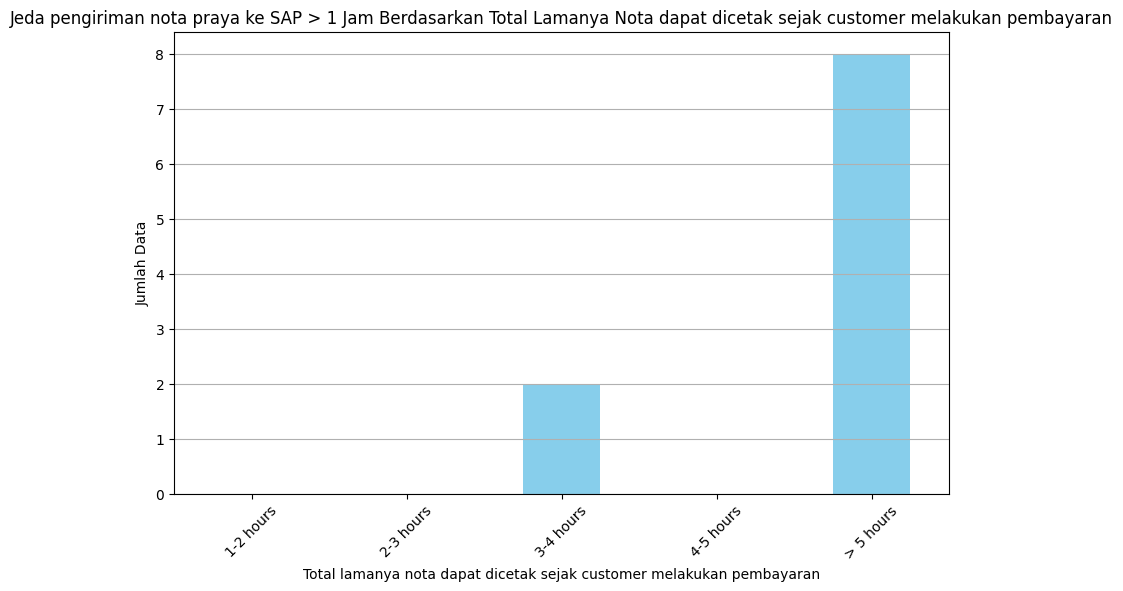

In [57]:
# Filter data yang memiliki sap_send_delay di atas 1 jam
df_filtered = df_pay_updated[df_pay_updated['sap_send_delay'] > pd.Timedelta(hours=1)]

# Buat kolom untuk kategori berdasarkan total_time_to_print_invoice
df_filtered['invoice_print_time_category'] = pd.cut(
    df_filtered['total_time_to_print_invoice'].dt.total_seconds() / 3600,
    bins=[0, 1, 2, 3, 4, float('inf')],
    labels=['1-2 hours', '2-3 hours', '3-4 hours', '4-5 hours', '> 5 hours']
)

# Hitung jumlah data per kategori
data_counts = df_filtered['invoice_print_time_category'].value_counts().sort_index()

# Buat bar plot
plt.figure(figsize=(10, 6))
data_counts.plot(kind='bar', color='skyblue')

plt.title('Jeda pengiriman nota praya ke SAP > 1 Jam Berdasarkan Total Lamanya Nota dapat dicetak sejak customer melakukan pembayaran')
plt.xlabel('Total lamanya nota dapat dicetak sejak customer melakukan pembayaran')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

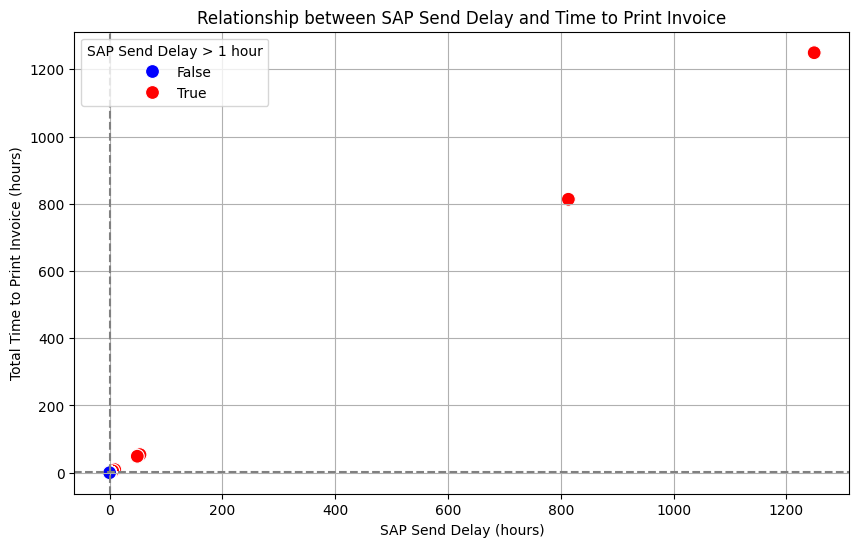

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pay_updated['sap_send_delay'].dt.total_seconds() / 3600,  # Convert to hours
                y=df_pay_updated['total_time_to_print_invoice'].dt.total_seconds() / 3600,  # Convert to hours
                hue=df_pay_updated['sap_send_delay'].dt.total_seconds() > 3600,  # Highlight delays > 1 hour
                palette={True: 'red', False: 'blue'}, 
                s=100)

plt.axvline(x=1, color='gray', linestyle='--')  # Garis vertikal pada 1 jam
plt.axhline(y=1, color='gray', linestyle='--')  # Garis horizontal pada 1 jam

plt.title('Relationship between SAP Send Delay and Time to Print Invoice')
plt.xlabel('SAP Send Delay (hours)')
plt.ylabel('Total Time to Print Invoice (hours)')
plt.legend(title='SAP Send Delay > 1 hour', loc='upper left')
plt.grid(True)
plt.show()

In [59]:
# add 7 hours due to server time
df_pay_updated['payment_date_ihub'] = df_pay_updated['payment_date_ihub'] + pd.to_timedelta(7, unit='hours')

In [60]:
df_pay_temp = df_pay_updated.copy()
df_pay_temp['difference'] = df_pay_temp['sap_complete'] - df_pay_temp['payment_date_ihub']

# Tampilkan hasil
df_pay_temp[['invoice_number', 'sap_complete', 'payment_date_ihub', 'total_time_to_print_invoice', 'difference']].sample(5)

,invoice_number,sap_complete,payment_date_ihub,total_time_to_print_invoice,difference
389,010.183.24-73.061112,2024-09-02 10:05:23,2024-09-02 10:04:00,0 days 00:01:23,0 days 00:01:23
344,010.182.24-01.010908,2024-09-02 15:49:12,2024-09-02 15:48:00,0 days 00:01:12,0 days 00:01:12
295,010.182.24-73.001348,2024-09-03 15:17:38,2024-09-03 15:16:00,0 days 00:01:38,0 days 00:01:38
80,010.182.24-01.011507,2024-09-06 22:23:06,2024-09-06 22:22:00,0 days 00:01:06,0 days 00:01:06
530,000.184.24-77.011098,2024-09-03 11:59:06,2024-09-03 11:58:00,0 days 00:01:06,0 days 00:01:06


In [61]:
df_pay_temp = df_pay_updated.copy()
df_pay_temp['difference'] = df_pay_temp['flagging_praya'] - df_pay_temp['payment_date_ihub']

# Tampilkan hasil
df_pay_temp[['invoice_number', 'flagging_praya', 'payment_date_ihub', 'flagging_praya_delay', 'difference']].sample(5)

,invoice_number,flagging_praya,payment_date_ihub,flagging_praya_delay,difference
158,010.643.24-74.028784,2024-09-05 17:38:02,2024-09-05 17:38:00,0 days 00:00:02,0 days 00:00:02
249,010.643.24-77.009175,2024-09-04 13:36:01,2024-09-04 13:36:00,0 days 00:00:01,0 days 00:00:01
261,010.183.24-73.061666,2024-09-04 09:40:12,2024-09-04 09:40:00,0 days 00:00:12,0 days 00:00:12
481,010.184.24-73.004703,2024-09-05 10:40:01,2024-09-05 10:40:00,0 days 00:00:01,0 days 00:00:01
579,000.184.24-73.017538,2024-09-02 09:21:00,2024-09-02 09:20:00,0 days 00:01:00,0 days 00:01:00


## Formula Conclusion

1. Jeda flagging lunas di PRAYA dari saat customer melakukan payment
    
    `flagging_praya_delay = flagging_praya - payment_date_ihub`

2. Jeda pengiriman nota praya ke SAP

    `sap_send_delay = sap_send_log - flagging praya`

3. Lama Proses Generate No Faktur di SAP
    
    `sap_nofaktur_generate_time = sap_complete - sap_send_log`

4. Total Lamanya Nota dapat dicetak sejak customer melakukan pembayaran

    `total_time_to_print_invoice = sap_complete - payment_date_ihub`

## EDA

In [62]:
columns = ['flagging_praya_delay', 'sap_send_delay', 'sap_nofaktur_generate_time', 'total_time_to_print_invoice']

# Calculate the average durations
avg_durations = {col: df_pay_updated[col].mean() for col in columns}

# Print the average durations
for col, avg_duration in avg_durations.items():
    print(f"{col}: {avg_duration}")

flagging_praya_delay: 0 days 00:00:09.487046632
sap_send_delay: 0 days 03:49:01.378238341
sap_nofaktur_generate_time: 0 days 00:00:28.799654576
total_time_to_print_invoice: 0 days 03:49:39.664939550


In [63]:
df_under_ahour = df_pay_updated[df_pay_updated['sap_send_delay'] < pd.Timedelta(hours=1)]

In [64]:
columns = ['flagging_praya_delay', 'sap_send_delay', 'sap_nofaktur_generate_time', 'total_time_to_print_invoice']

# Calculate the average durations
avg_durations = {col: df_under_ahour[col].mean() for col in columns}

# Print the average durations
for col, avg_duration in avg_durations.items():
    print(f"{col}: {avg_duration}")

flagging_praya_delay: 0 days 00:00:09.235500878
sap_send_delay: 0 days 00:01:04.759226713
sap_nofaktur_generate_time: 0 days 00:00:29.107205623
total_time_to_print_invoice: 0 days 00:01:43.101933216


In [65]:
df_pay_updated[~((df_pay_updated['sap_complete'].dt.year == 2024) & (df_pay_updated['sap_complete'].dt.month == 9))]

,invoice_number,payment_code,payment_date_ihub,flagging_praya,sap_send_log,sap_complete,flagging_praya_delay,sap_send_delay,sap_nofaktur_generate_time,total_time_to_print_invoice


In [66]:
df_pay_updated.sap_complete.dt.date.unique()

array([datetime.date(2024, 9, 8), datetime.date(2024, 9, 7),
       datetime.date(2024, 9, 6), datetime.date(2024, 9, 5),
       datetime.date(2024, 9, 4), datetime.date(2024, 9, 3),
       datetime.date(2024, 9, 2), datetime.date(2024, 9, 1)], dtype=object)

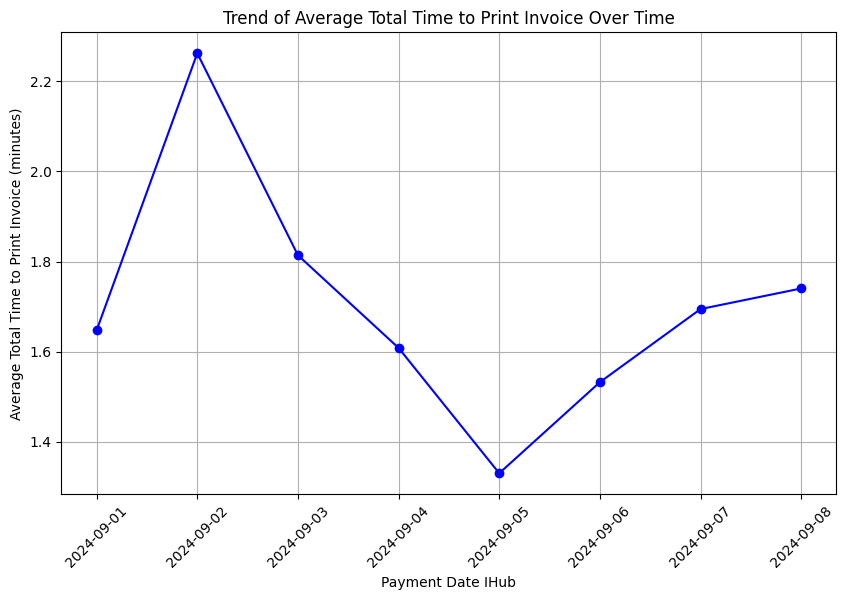

In [67]:
df_pay_plot = df_under_ahour.copy()

df_pay_plot['date'] = df_pay_plot['sap_complete'].dt.date

df_pay_plot['total_time_to_print_invoice_sec'] = df_pay_plot['total_time_to_print_invoice'].dt.total_seconds() / 60
average_time_per_day = df_pay_plot.groupby('date')['total_time_to_print_invoice_sec'].mean()

plt.figure(figsize=(10, 6))
average_time_per_day.plot(kind='line', marker='o', color='blue')

plt.title('Trend of Average Total Time to Print Invoice Over Time')
plt.xlabel('Payment Date IHub')
plt.ylabel('Average Total Time to Print Invoice (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [68]:
average_time_per_day

date
2024-09-01    1.647436
2024-09-02    2.261883
2024-09-03    1.813927
2024-09-04    1.608333
2024-09-05    1.330449
2024-09-06    1.532444
2024-09-07    1.694565
2024-09-08    1.740278
Name: total_time_to_print_invoice_sec, dtype: float64

Grafik ini menunjukkan fluktuasi dalam waktu yang dibutuhkan untuk mencetak nota sejak pembayaran dilakukan oleh pelanggan. Ada hari-hari di mana proses pencetakan lebih lambat (seperti 2 September), namun terdapat hari lain ketika proses ini lebih cepat (seperti 5 September).

In [69]:
df_under_ahour.sap_complete.dt.date.value_counts()

sap_complete
2024-09-02    108
2024-09-05    104
2024-09-07     92
2024-09-04     80
2024-09-06     75
2024-09-03     73
2024-09-08     24
2024-09-01     13
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11640\2915541490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_ahour['flagging_praya_delay_minutes'] = df_under_ahour['flagging_praya_delay'].dt.total_seconds() / 60
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11640\2915541490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_ahour['sap_send_delay_minutes'] = df_under_ahour['sap_send_delay'].dt.total_seconds() / 60
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11640\2915541490.py:4: Sett

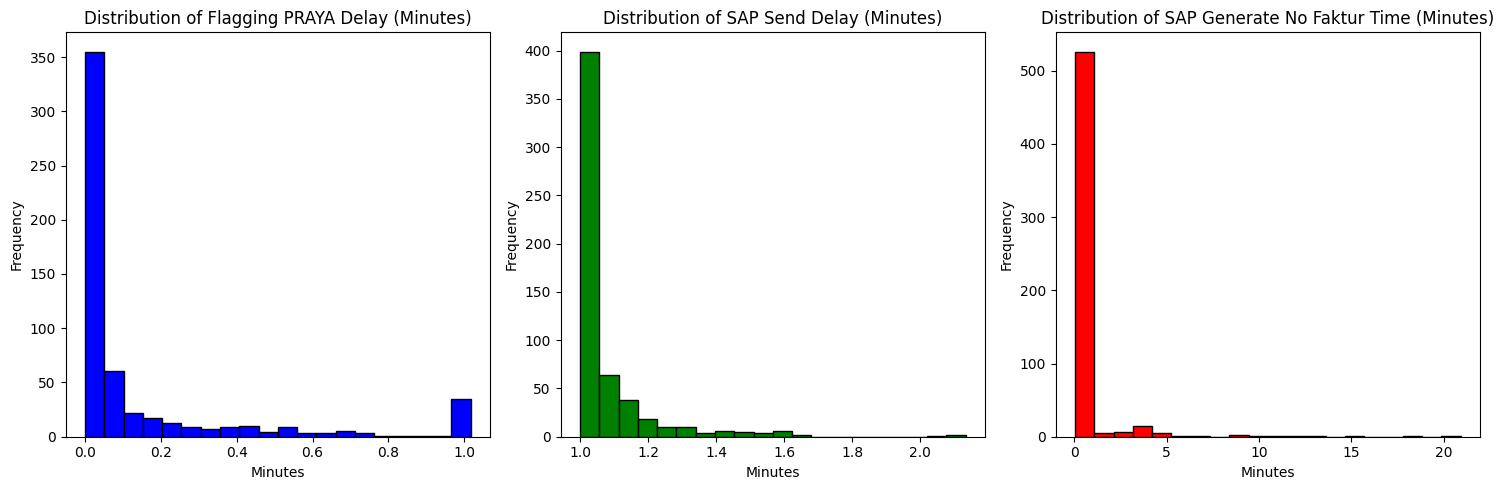

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11640\2915541490.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Flagging PRAYA Delay', 'SAP Send Delay', 'SAP Generate No Faktur Time'])


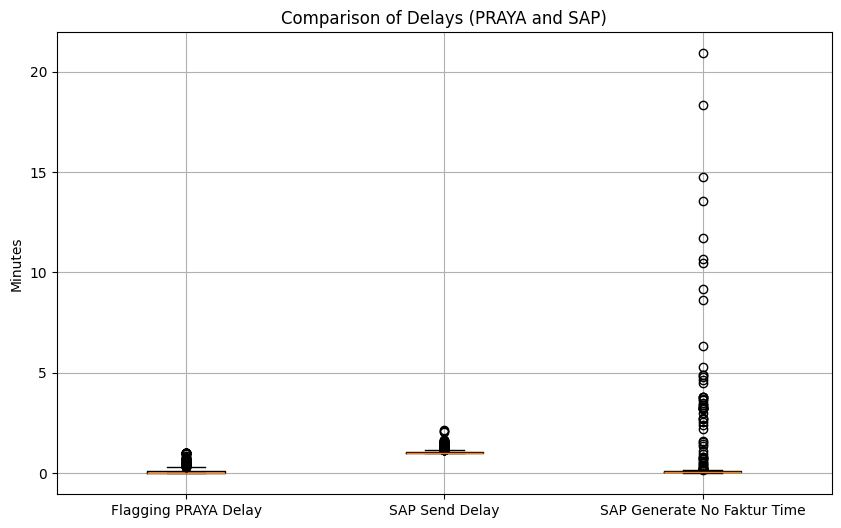

In [70]:
# Mengonversi timedelta menjadi detik atau menit untuk kemudahan analisis
df_under_ahour['flagging_praya_delay_minutes'] = df_under_ahour['flagging_praya_delay'].dt.total_seconds() / 60
df_under_ahour['sap_send_delay_minutes'] = df_under_ahour['sap_send_delay'].dt.total_seconds() / 60
df_under_ahour['sap_nofaktur_generate_time_minutes'] = df_under_ahour['sap_nofaktur_generate_time'].dt.total_seconds() / 60

# 1. Membuat histogram untuk setiap delay
plt.figure(figsize=(15, 5))

# Histogram untuk flagging_praya_delay (PRAYA)
plt.subplot(1, 3, 1)
plt.hist(df_under_ahour['flagging_praya_delay_minutes'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Flagging PRAYA Delay (Minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Histogram untuk sap_send_delay (PRAYA ke SAP)
plt.subplot(1, 3, 2)
plt.hist(df_under_ahour['sap_send_delay_minutes'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of SAP Send Delay (Minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Histogram untuk sap_nofaktur_generate_time (SAP)
plt.subplot(1, 3, 3)
plt.hist(df_under_ahour['sap_nofaktur_generate_time_minutes'], bins=20, color='red', edgecolor='black')
plt.title('Distribution of SAP Generate No Faktur Time (Minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Membuat boxplot untuk ketiga delay sekaligus
plt.figure(figsize=(10, 6))
data_to_plot = [
    df_under_ahour['flagging_praya_delay_minutes'].dropna(),
    df_under_ahour['sap_send_delay_minutes'].dropna(),
    df_under_ahour['sap_nofaktur_generate_time_minutes'].dropna()
]

plt.boxplot(data_to_plot, labels=['Flagging PRAYA Delay', 'SAP Send Delay', 'SAP Generate No Faktur Time'])
plt.title('Comparison of Delays (PRAYA and SAP)')
plt.ylabel('Minutes')
plt.grid(True)
plt.show()

**Interpretasi Histogram dan Box Plot**

- **PRAYA**: Proses flagging lunas di **PRAYA sangat cepat**, sehingga tidak menjadi penyebab utama keterlambatan.
- **PRAYA ke SAP**: Pengiriman nota dari **PRAYA ke SAP juga berjalan lancar** dengan keterlambatan yang sangat minimal.
- **SAP**: Proses di SAP, terutama generate nomor faktur, adalah komponen yang **paling sering mengalami gangguan** atau keterlambatan signifikan. Outlier dalam proses ini menunjukkan bahwa SAP kadang-kadang membutuhkan waktu yang jauh lebih lama daripada yang diharapkan untuk menyelesaikan pemrosesan faktur, yang dapat mempengaruhi total waktu pencetakan nota.

Jika keterlambatan terjadi dalam proses pencetakan nota, **SAP adalah sistem yang paling mungkin mengalami gangguan atau keterlambatan, berdasarkan visualisasi dan data yang ada**.

In [73]:
df_pay_updated.to_excel(r'C:\Users\Lenovo\Documents\Work\Pelindo\data\Data_Praya_Updated.xlsx', index=False)